<a href="https://colab.research.google.com/github/Srija-Burugula/FraudDetection/blob/main/fraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
df = pd.read_csv("/content/train_hsbc_df.csv")

In [3]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1.0
1,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1.0
2,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1.0
3,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1.0
4,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1.0


# **STEP 1: DATA PREPROCESSING**



1.   Evaluating Skew



Skewness for each numerical column:
step       3.600223
amount    12.686548
fraud      2.760770
dtype: float64


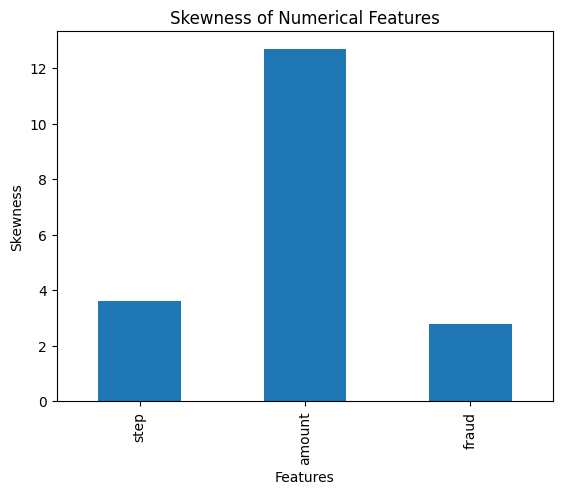

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

# Compute skewness for each numerical column
skewness = df.select_dtypes(include=[np.number]).apply(lambda x: skew(x.dropna()))
print("Skewness for each numerical column:")
print(skewness)

# Plot skewness values
skewness.plot(kind='bar')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()


In [5]:
import numpy as np

# Apply Log Transformation
df['amount_log'] = np.log1p(df['amount'])  # log1p handles zero values
print("Skewness after Log Transformation:", df['amount_log'].skew())


Skewness after Log Transformation: 0.4855329091904135



understanding the dataset


In [12]:
print(df.category.value_counts())

category
12    50899
4      2532
14     2138
10     2043
3      1422
0      1254
7      1245
2       816
6       622
13      532
5       463
8       414
9       378
11      368
1        78
15        1
Name: count, dtype: int64


Text(0, 0.5, 'Number of Transactions')

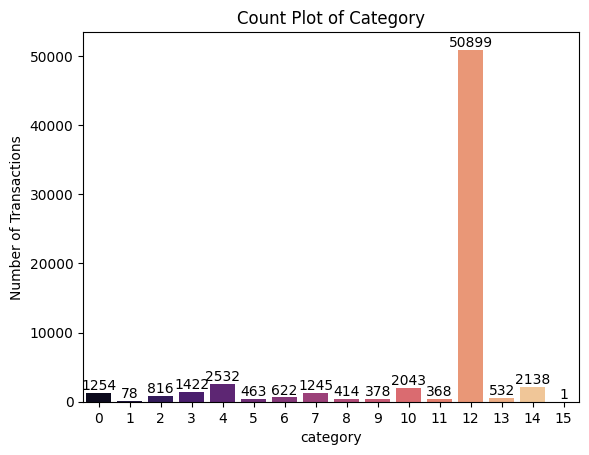

In [13]:
ax = sns.countplot(x='category', data=df, palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count Plot of Category')
plt.ylabel('Number of Transactions')

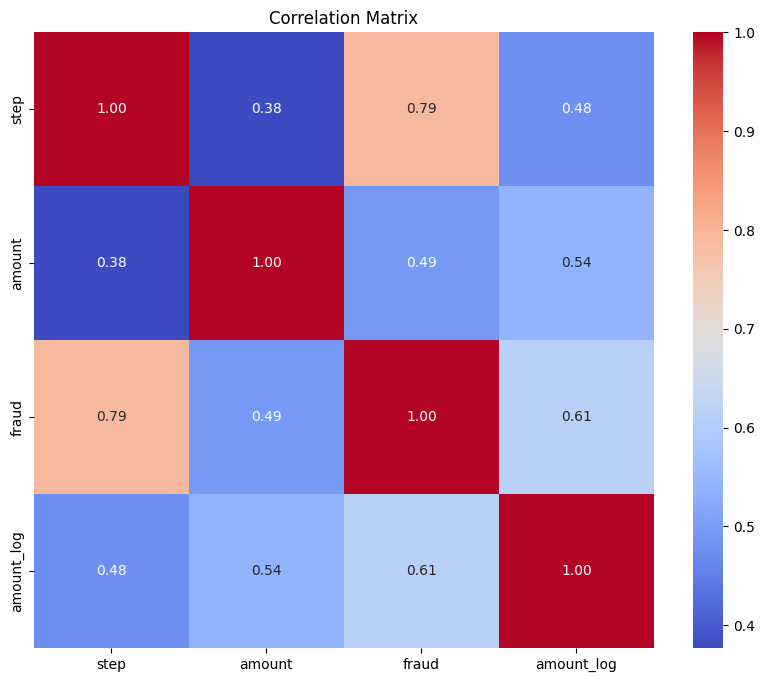

In [6]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [18]:
data_types = df.dtypes

# Describe the dataset
description = df.describe(include='all')

# Print the data types
print("Data Types:\n", data_types)

# Print the description of the dataset
print("\nDataset Description:\n", description)

Data Types:
 step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

Dataset Description:
                  step       customer     age  gender zipcodeOri  \
count   513643.000000         513643  513643  513643     513643   
unique            NaN           4112       8       4          1   
top               NaN  'C1978250683'     '2'     'F'    '28007'   
freq              NaN            220  161810  280199     513643   
mean        94.992629            NaN     NaN     NaN        NaN   
std         51.063474            NaN     NaN     NaN        NaN   
min          0.000000            NaN     NaN     NaN        NaN   
25%         52.000000            NaN     NaN     NaN        NaN   
50%         97.000000            NaN     NaN     NaN        NaN   
75%        139.000000            NaN     NaN     N

In [14]:
df.describe()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,amount_log,fraudulent_count,fair_count
count,65205.000000,65205.000000,65205.000000,65205.000000,65205.000000,65205.000000,65205.000000,65205.000000,65204.000000,65204.000000,65204.000000,65205.000000,65205.000000
mean,20.239583,1994.844030,3.002945,1.440932,0.000015,27.024247,0.000015,10.884273,79.653748,0.095086,3.385879,3.004770,18.509225
std,28.599136,1145.383509,1.333823,0.501512,0.003916,8.702547,0.003916,2.960636,299.080204,0.293336,1.190222,13.026853,6.346025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1008.000000,2.000000,1.000000,0.000000,18.000000,0.000000,12.000000,14.947500,0.000000,2.769302,0.000000,18.000000
50%,14.000000,1992.000000,3.000000,1.000000,0.000000,30.000000,0.000000,12.000000,29.230000,0.000000,3.408835,0.000000,20.000000
75%,21.000000,2966.000000,4.000000,2.000000,0.000000,30.000000,0.000000,12.000000,48.130000,0.000000,3.894470,1.000000,22.000000
max,179.000000,4004.000000,8.000000,4.000000,1.000000,50.000000,1.000000,15.000000,7665.560000,1.000000,8.944623,122.000000,27.000000





2. Adding a new feature - number of fradulent and non-fradulent trasactions for each customer




In [15]:
import pandas as pd

df['fraudulent_count'] = df.groupby('customer')['fraud'].transform('sum')
df['fair_count'] = df.groupby('customer')['fraud'].transform(lambda x: (x == 0).sum())

# Display the updated DataFrame
print(df[['customer', 'fraudulent_count', 'fair_count']].drop_duplicates())

       customer  fraudulent_count  fair_count
0          3143              11.0           2
1           703              10.0           1
2           352               4.0           1
3          3936               3.0           0
4           944              15.0           1
...         ...               ...         ...
63625      1498               0.0           1
64310      1804               0.0           1
64553      1069               0.0           1
65092       736               0.0           1
65204       744               0.0           0

[4005 rows x 3 columns]


In [ ]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,fraudulent_count,fair_count
0,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1,11,107
1,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1,10,33
2,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1,4,104
3,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1,3,81
4,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1,15,110


# **STEP 2: TRAIN TEST SPLIT**

Splitting the data and applying **Synthetic Minority Oversampling Technique(SMOTE)** to address the problem of class imbalance in datasets
(only on the train data)


Training dataset shape after SMOTE: (811926, 9)
Test dataset shape: (102729, 9)


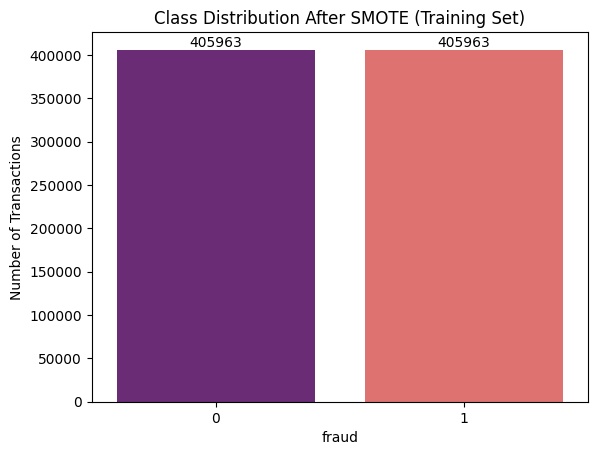

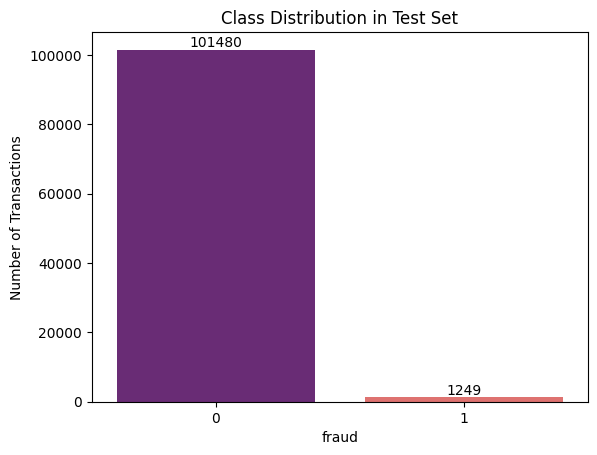

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Encode categorical variables
label_encoders = {}
for column in ['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 2: Define features (X) and target (y)
X = df.drop('fraud', axis=1)  # Drop the target column 'fraud'
y = df['fraud']               # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to handle class imbalance on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 5: Print dataset shapes before and after SMOTE
print(f"Training dataset shape after SMOTE: {X_train.shape}")
print(f"Test dataset shape: {X_test.shape}")

# Step 6: Plot class distribution after SMOTE on training data
ax = sns.countplot(x=y_train, palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class Distribution After SMOTE (Training Set)')
plt.ylabel('Number of Transactions')
plt.show()

# Plot class distribution in the test set (original distribution)
ax = sns.countplot(x=y_test, palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class Distribution in Test Set')
plt.ylabel('Number of Transactions')
plt.show()


# **STEP 3. INITIAL TRAINING AND TESTING OF ML** **MODELS**

**1. Linear Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialize and train the Logistic Regression model
linear_model = LogisticRegression(max_iter=1000, random_state=42)
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred = linear_model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    101480
           1       0.18      0.87      0.30      1249

    accuracy                           0.95    102729
   macro avg       0.59      0.91      0.64    102729
weighted avg       0.99      0.95      0.97    102729

Confusion Matrix:
[[96545  4935]
 [  168  1081]]


**2. Decision tree**

In [21]:
pip install graphviz


In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Detailed performance metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Decision Tree Accuracy: 0.99
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    101480
           1       0.57      0.79      0.66      1249

    accuracy                           0.99    102729
   macro avg       0.78      0.89      0.83    102729
weighted avg       0.99      0.99      0.99    102729

Confusion Matrix:
[[100734    746]
 [   263    986]]


KeyboardInterrupt: 

**4. Random Forest**

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=50,
    criterion='entropy',
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Save the DataFrame to a CSV file
results_df.to_csv('actual_vs_predicted.csv', index=False)


Accuracy: 0.9902
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    101480
           1       0.57      0.79      0.66      1249

    accuracy                           0.99    102729
   macro avg       0.78      0.89      0.83    102729
weighted avg       0.99      0.99      0.99    102729

Confusion Matrix:
[[100734    746]
 [   263    986]]


**TRYING BOOSTING TECHNIQUES**

**1. XGBoost**

In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Objective function for binary classification
    eval_metric='logloss',        # Evaluation metric for model performance
    use_label_encoder=False,      # Avoid deprecated warning about label encoder
    random_state=42               # For reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.9902
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    101480
           1       0.56      0.91      0.69      1249

    accuracy                           0.99    102729
   macro avg       0.78      0.95      0.84    102729
weighted avg       0.99      0.99      0.99    102729

Confusion Matrix:
[[100585    895]
 [   115   1134]]


**2. CatBoost**

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize CatBoost model
catboost_model = CatBoostClassifier(
    iterations=10,             # Number of boosting iterations
    learning_rate=0.05,          # Learning rate
    depth=6,                     # Depth of the trees
    eval_metric='Logloss',       # Evaluation metric
    random_state=42,             # For reproducibility
    cat_features=None,           # If you have categorical features, specify their indices here
    verbose=200                  # Print progress every 200 iterations
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred_catboost)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))


0:	learn: 0.6496391	total: 105ms	remaining: 949ms
9:	learn: 0.3954136	total: 1.04s	remaining: 0us
Accuracy: 0.9566
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    101480
           1       0.22      0.98      0.35      1249

    accuracy                           0.96    102729
   macro avg       0.61      0.97      0.67    102729
weighted avg       0.99      0.96      0.97    102729

Confusion Matrix:
[[97048  4432]
 [   31  1218]]


**3. Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=10,         # Number of boosting stages to be run
    learning_rate=0.1,        # Learning rate shrinks the contribution of each tree
    max_depth=3,              # Maximum depth of the individual trees
    random_state=42           # For reproducibility
)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")

# Classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.94
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    101480
           1       0.17      0.99      0.29      1249

    accuracy                           0.94    102729
   macro avg       0.59      0.97      0.63    102729
weighted avg       0.99      0.94      0.96    102729

Confusion Matrix:
[[95539  5941]
 [   13  1236]]


# **STEP 4: HYPER PARAMETER TUNING**

Hyper parameter tuning for Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,            # Number of parameter settings sampled
    cv=5,                 # Number of folds in cross-validation
    verbose=2,            # Verbosity level
    random_state=42,
    n_jobs=-1              # Use all available cores
)

# Perform Random Search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters Found:")
print(random_search.best_params_)
print("Best Score Found:")
print(random_search.best_score_)

# Train the model with the best parameters
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


Hyper parameter tuning on XR Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Initialize RandomizedSearchCV with reduced n_iter
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,            # Reduced number of parameter settings sampled
    cv=5,                 # Number of folds in cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform Random Search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters Found:")
print(random_search.best_params_)
print("Best Score Found:")
print(random_search.best_score_)

# Train the model with the best parameters
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found:
{'subsample': 0.8, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best Score Found:
0.9924623686480156
Accuracy: 0.9879
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    101480
           1       0.50      0.92      0.65      1249

    accuracy                           0.99    102729
   macro avg       0.75      0.95      0.82    102729
weighted avg       0.99      0.99      0.99    102729

Confusion Matrix:
[[100340   1140]
 [   106   1143]]


In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score
df = pd.read_csv("/content/test_hsbc_df.csv")
X = df.drop('fraud', axis=1)
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,77,'C1787537369','2','M','28007','M1741626453','28007','es_sportsandtoys',668.06,1
1,63,'C617723960','4','F','28007','M980657600','28007','es_sportsandtoys',130.93,1
2,101,'C910454738','4','F','28007','M855959430','28007','es_hyper',5.45,1
3,32,'C515668508','3','F','28007','M1198415165','28007','es_wellnessandbeauty',260.48,1
4,63,'C1647495093','3','M','28007','M3697346','28007','es_leisure',254.26,1
...,...,...,...,...,...,...,...,...,...,...
80995,150,'C1372889664','5','F','28007','M1823072687','28007','es_transportation',8.46,0
80996,9,'C1942983218','4','F','28007','M1823072687','28007','es_transportation',7.53,0
80997,141,'C908342050','2','F','28007','M348934600','28007','es_transportation',25.74,0
80998,141,'C852586467','4','M','28007','M348934600','28007','es_transportation',48.04,0


In [ ]:

ypred= best_xgb_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
xgb_y_prob = best_xgb_model.predict_proba(X_test)[:, 1]
print("AUC-ROC",roc_auc_score(y_test, xgb_y_prob))



Confusion Matrix:
[[100340   1140]
 [   106   1143]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    101480
           1       0.60      0.86      0.71      1249

    accuracy                           0.99    102729
   macro avg       0.80      0.93      0.85    102729
weighted avg       0.99      0.99      0.99    102729

AUC-ROC 0.9965522989933137


In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predictions from Random Forest model

# Predictions from XGBoost model
xgb_y_pred = best_xgb_model.predict(X_test)
xgb_y_prob = best_xgb_model.predict_proba(X_test)[:, 1]  # For AUC-ROC

# Initialize a dictionary to hold the results
results = {
    "Model": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "AUC-ROC": []
}

# Calculate metrics for Random Forest

# Calculate metrics for XGBoost
results["Model"].append("XGBoost")
results["Precision"].append(precision_score(y_test, xgb_y_pred))
results["Recall"].append(recall_score(y_test, xgb_y_pred))
results["F1 Score"].append(f1_score(y_test, xgb_y_pred))
results["AUC-ROC"].append(roc_auc_score(y_test, xgb_y_prob))

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


     Model  Precision    Recall  F1 Score   AUC-ROC
0  XGBoost   0.500657  0.915132  0.647225  0.996552


# **STEP 5: APPLYING ENSEMBLING TECHNIQUES**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Define base models using the hyperparameter-tuned models
base_models = [
    ('rf', best_rf_model),  # Hyperparameter-tuned Random Forest
    ('xgb', best_xgb_model)  # Hyperparameter-tuned XGBoost
]

# Define meta-model (Support Vector Classifier in this case)
meta_model = SVC(probability=True, random_state=42)

# Initialize StackingClassifier with the base models and meta-model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
